# Naive Bayes (Bayes Ingenuo)

## No es necesario realizar gráficos/matriz de correlación ya que estas ya se realizaron en el análisis exploratorio.

#### Importar librerías necesarias

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

#### Carga de datos y preparación de variables

In [107]:
df = pd.read_csv("train.csv")

# Variables predictoras (las mismas que en modelos anteriores)
variables_numericas = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
    '1stFlrSF', 'FullBath', 'YearBuilt', 'KitchenAbvGr',
    'TotRmsAbvGrd', 'Fireplaces', 'SalePrice'
]

df = df[variables_numericas]


#### Definir X (variables predictoras) y "y" (variable respuesta)

In [108]:
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

#### Dividir datos en entrenamienta y prueba

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, test_size=0.3)

#### Configurar Pipeline y Árbol de Regresión
##### Escalamos variables numéricas para estandarizar.


In [110]:
numerical_preprocessor = StandardScaler()
preprocessor = ColumnTransformer([
    ('num', numerical_preprocessor, X.columns)
])

naive_bayes_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GaussianNB())
])

#### Entrenar el modelo

In [111]:
naive_bayes_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF',
       'FullBath', 'YearBuilt', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces'],
      dtype='object'))])),
                ('regressor', GaussianNB())])

#### Predicciones en el conjunto de prueba

In [112]:
y_pred_nb = naive_bayes_pipeline.predict(X_test)

#### Evaluación del modelo con métricas de regresión

In [113]:
mae_nb = mean_absolute_error(y_test, y_pred_nb)
mse_nb = mean_squared_error(y_test, y_pred_nb)
rmse_nb = np.sqrt(mse_nb)

print(f"📌 Mean Absolute Error (MAE): {mae_nb:.2f}")
print(f"📌 Mean Squared Error (MSE): {mse_nb:.2f}")
print(f"📌 Root Mean Squared Error (RMSE): {rmse_nb:.2f}")

📌 Mean Absolute Error (MAE): 30461.95
📌 Mean Squared Error (MSE): 2119162831.51
📌 Root Mean Squared Error (RMSE): 46034.37


#### Tunneamos el modelo

In [114]:
params =  [{
    "regressor__var_smoothing": np.logspace(0,-9, num=100)
}]
modelo = GridSearchCV(naive_bayes_pipeline,param_grid=params,n_jobs=2, cv=5,scoring="neg_root_mean_squared_error")
modelo.fit(X_train,y_train)
modelo.best_params_

c:\Users\n8nug\Documents\Uni\2025 - 1er Semestre\Minería de Datos\PR2-MD\venv\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'regressor__var_smoothing': np.float64(0.03511191734215131)}

#### Podemos ver que el valor es de 0.05, así que vamos a predecir con este modelo

In [115]:
print(modelo.best_estimator_)
print('best score:')
print(modelo.best_score_)
y_mejor_pred = modelo.best_estimator_.predict(X_test)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF',
       'FullBath', 'YearBuilt', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces'],
      dtype='object'))])),
                ('regressor',
                 GaussianNB(var_smoothing=np.float64(0.03511191734215131)))])
best score:
-40145.80334236766


#### Después del tuning

In [116]:
mae_nb = mean_absolute_error(y_test, y_mejor_pred)
mse_nb = mean_squared_error(y_test, y_mejor_pred)
rmse_nb = np.sqrt(mse_nb)

print(f"📌 Mean Absolute Error (MAE): {mae_nb:.2f}")
print(f"📌 Mean Squared Error (MSE): {mse_nb:.2f}")
print(f"📌 Root Mean Squared Error (RMSE): {rmse_nb:.2f}")

📌 Mean Absolute Error (MAE): 26564.78
📌 Mean Squared Error (MSE): 1677049150.36
📌 Root Mean Squared Error (RMSE): 40951.79


#### Visualización de diferencias entre predicción y valor real

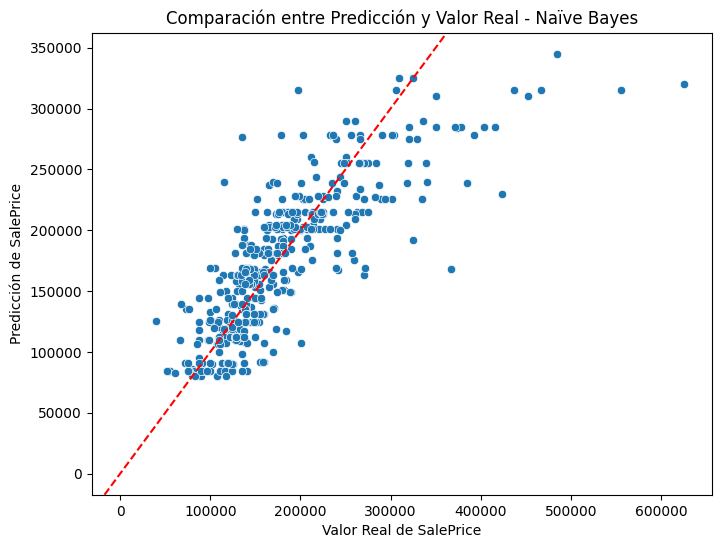

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_nb)
plt.xlabel('Valor Real de SalePrice')
plt.ylabel('Predicción de SalePrice')
plt.title('Comparación entre Predicción y Valor Real - Naïve Bayes')
plt.axline((0, 0), slope=1, color="red", linestyle="--")
plt.show()

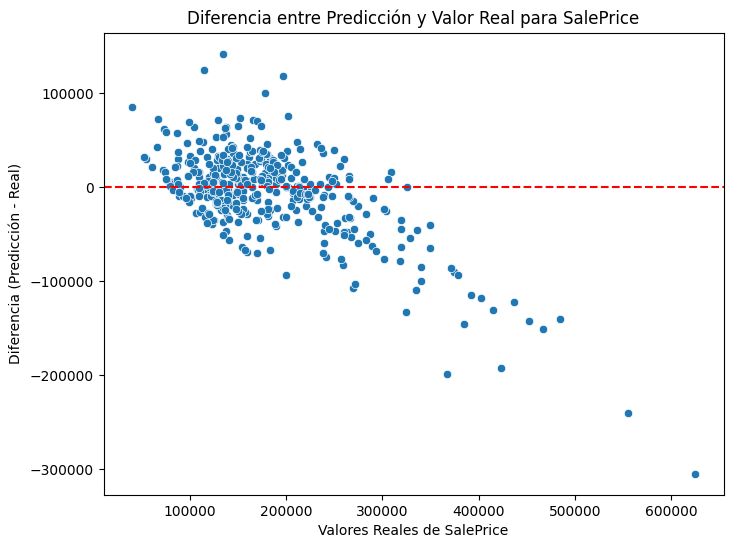

In [ ]:
differences = y_pred_nb - y_test

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=differences)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Reales de SalePrice')
plt.ylabel('Diferencia (Predicción - Real)')
plt.title('Diferencia entre Predicción y Valor Real para SalePrice')
plt.show()

#### Histogramas de diferencias

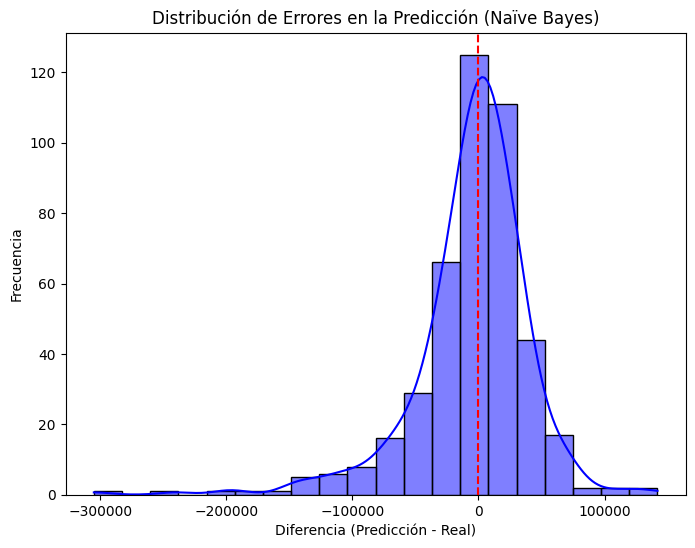

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_nb - y_test, kde=True, bins=20, color="blue", edgecolor="black")
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Diferencia (Predicción - Real)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Errores en la Predicción (Naïve Bayes)')
plt.show()